In [4]:
import pandas as pd

df = pd.read_csv("/content/sample_data/Tweets.csv.zip")
df = df[['text', 'airline_sentiment']].dropna()
df = df.sample(1000, random_state=42).reset_index(drop=True)


In [8]:
from textblob import TextBlob
from transformers import pipeline

# Initialize BERT pipeline (make sure transformers is installed)
bert_pipeline = pipeline("sentiment-analysis")

# TEXTBLOB SENTIMENT FUNCTION
def get_sentiment_textblob(text):
    try:
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0.1:
            return "Positive"
        elif polarity < -0.1:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"

# BERT SENTIMENT FUNCTION
def get_sentiment_bert(text):
    try:
        result = bert_pipeline(text[:512])[0]['label']
        if "POS" in result:
            return "Positive"
        elif "NEG" in result:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


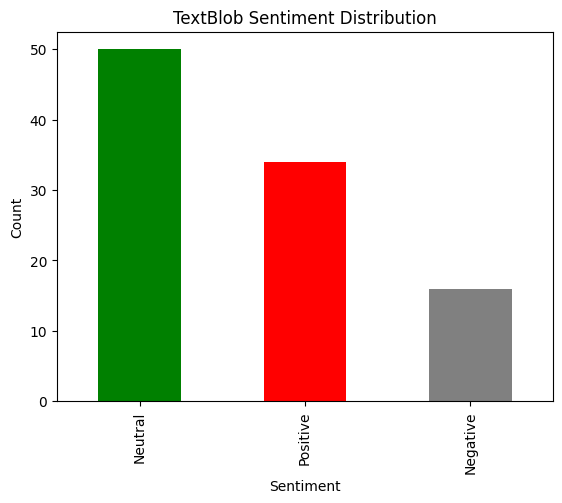

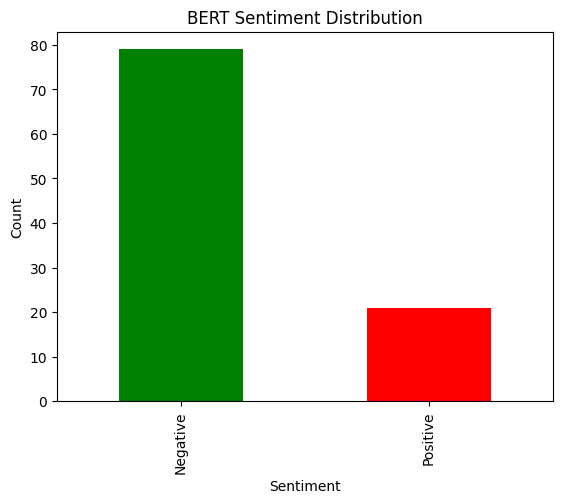


🔹 Sample Tweets with Sentiments:

[TextBlob: Neutral | BERT: Negative] → @SouthwestAir my flight is Cancelled Flightled due to weather. What next ?
[TextBlob: Neutral | BERT: Positive] → @AmericanAir amen!
[TextBlob: Neutral | BERT: Negative] → @JetBlue? | RT @WMCActionNews5: New airline expected to make its way to MEM http://t.co/Gbd5R1OlSI
[TextBlob: Neutral | BERT: Negative] → @united why am i mot getting my refund?
[TextBlob: Negative | BERT: Negative] → @united FAIL You Cancelled Flightled our flight frm GJT and then used our reserv home to IAH (from S


In [11]:
import pandas as pd
from textblob import TextBlob
from transformers import pipeline
import matplotlib.pyplot as plt

# TextBlob Sentiment Function
def get_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# BERT Sentiment Function
def get_sentiment_bert(text):
    result = bert_pipeline(text[:512])[0]['label']
    return "Positive" if "POS" in result else "Negative"

# Choose sample size
sample_size = 100
df_sample = df.sample(sample_size, random_state=42).reset_index(drop=True)

# Apply sentiment analysis
df_sample['TextBlob_Sentiment'] = df_sample['text'].apply(get_sentiment_textblob)
df_sample['BERT_Sentiment'] = df_sample['text'].apply(get_sentiment_bert)

# Plot sentiment distribution
def plot_distribution(column, title):
    counts = df_sample[column].value_counts()
    counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.title(title)
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

# Visualizations
plot_distribution('TextBlob_Sentiment', "TextBlob Sentiment Distribution")
plot_distribution('BERT_Sentiment', "BERT Sentiment Distribution")

# Sample output
print("\n🔹 Sample Tweets with Sentiments:\n")
for i in range(5):
    print(f"[TextBlob: {df_sample.loc[i, 'TextBlob_Sentiment']} | BERT: {df_sample.loc[i, 'BERT_Sentiment']}] → {df_sample.loc[i, 'text'][:100]}")